In [1]:
#import environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../input/travel-insurance/travel_insurance.csv')
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
df.dtypes

Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [4]:
#change to bool

def change_bool_yes_no(df, column):
    df[column] = df[column].map({'Yes': True, 1: True, 'No': False, 0: False})
    return df

travel_df = df.copy()
change_bool_yes_no(travel_df,'GraduateOrNot')
change_bool_yes_no(travel_df,'FrequentFlyer')
change_bool_yes_no(travel_df,'EverTravelledAbroad')
change_bool_yes_no(travel_df,'ChronicDiseases')
change_bool_yes_no(travel_df,'TravelInsurance')

travel_df.rename(columns = {'Employment Type' : 'EmploymentType'}, inplace = True)

In [5]:
travel_df.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,True,400000,6,True,False,False,False
1,31,Private Sector/Self Employed,True,1250000,7,False,False,False,False
2,34,Private Sector/Self Employed,True,500000,4,True,False,False,True
3,28,Private Sector/Self Employed,True,700000,3,True,False,False,False
4,28,Private Sector/Self Employed,True,700000,8,True,True,False,False


In [6]:
travel_df.count()

Age                    1987
EmploymentType         1987
GraduateOrNot          1987
AnnualIncome           1987
FamilyMembers          1987
ChronicDiseases        1987
FrequentFlyer          1987
EverTravelledAbroad    1987
TravelInsurance        1987
dtype: int64

In [7]:
travel_df.describe()

,Age,AnnualIncome,FamilyMembers
count,1987.000000,1.987000e+03,1987.000000
mean,29.650226,9.327630e+05,4.752894
std,2.913308,3.768557e+05,1.609650
min,25.000000,3.000000e+05,2.000000
25%,28.000000,6.000000e+05,4.000000
50%,29.000000,9.000000e+05,5.000000
75%,32.000000,1.250000e+06,6.000000
max,35.000000,1.800000e+06,9.000000


Text(0.5, 1.0, 'Customer percentage')

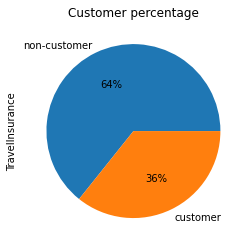

In [8]:
travel_df['TravelInsurance'].value_counts(normalize = True).plot.pie(labels=['non-customer','customer'],autopct="%1.f%%")
plt.title('Customer percentage')

Text(0.5, 1.0, 'Which sector is buying insurance more than other')

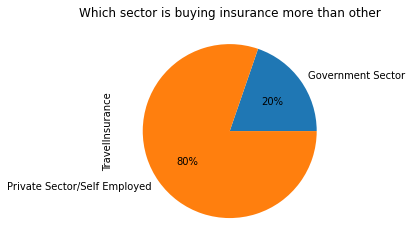

In [9]:
cus_df = travel_df.query('TravelInsurance == True')
cus_df.groupby('EmploymentType')['TravelInsurance'].agg('count').plot.pie(autopct= '%1.f%%')
plt.title('Which sector is buying insurance more than other')

In [10]:
travel_df.groupby('EmploymentType')['EmploymentType'].count()

EmploymentType
Government Sector                570
Private Sector/Self Employed    1417
Name: EmploymentType, dtype: int64

Text(0.5, 0.98, 'Compared customer percent per sector')

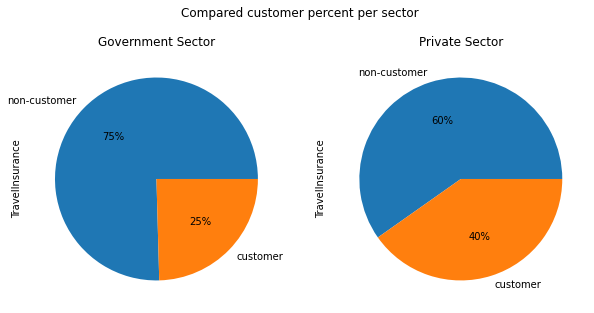

In [11]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
label = ['non-customer','customer']
## pie chart for government
gov_df = travel_df.query('EmploymentType == "Government Sector"')
ax1 = gov_df['TravelInsurance'].value_counts(normalize = True).plot.pie(labels = label,autopct= '%1.f%%')
plt.title('Government Sector')
## pie chart for pivate segment
plt.subplot(1,2,2)
pri_df = travel_df.query('EmploymentType == "Private Sector/Self Employed"')
ax2 = pri_df['TravelInsurance'].value_counts(normalize = True).plot.pie(labels = label,autopct='%1.f%%')
plt.title('Private Sector')

plt.suptitle('Compared customer percent per sector')

In [12]:
travel_df.groupby('TravelInsurance').sum()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
TravelInsurance,,,,,,,
False,37694,1081,1048800000,5947,347,178,82
True,21221,611,804600000,3497,205,239,298


In [13]:
travel_df.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,True,400000,6,True,False,False,False
1,31,Private Sector/Self Employed,True,1250000,7,False,False,False,False
2,34,Private Sector/Self Employed,True,500000,4,True,False,False,True
3,28,Private Sector/Self Employed,True,700000,3,True,False,False,False
4,28,Private Sector/Self Employed,True,700000,8,True,True,False,False


In [14]:
cus_bar = cus_df.groupby(['FrequentFlyer','EverTravelledAbroad'])['TravelInsurance'].count()
cus_bar.reset_index()

,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,False,False,321
1,False,True,150
2,True,False,91
3,True,True,148


In [15]:
non_cus_df = travel_df.query('TravelInsurance == 0')
non_cus_bar = non_cus_df.groupby(['FrequentFlyer','EverTravelledAbroad'])['TravelInsurance'].count()
non_cus_bar.reset_index()

,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,False,False,1037
1,False,True,62
2,True,False,158
3,True,True,20


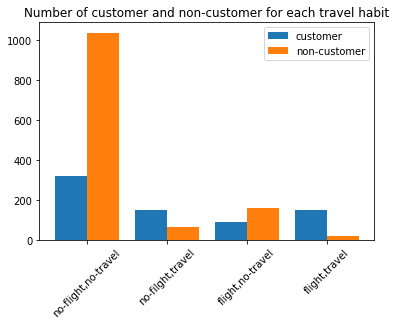

In [16]:
x = ['no-flight,no-travel','no-filght,travel','flight,no-travel','flight,travel']
X_axis= np.arange(len(x))
plt.bar(X_axis - 0.2, cus_bar, 0.4, label= 'customer')
plt.bar(X_axis + 0.2, non_cus_bar, 0.4, label= 'non-customer')

plt.xticks(X_axis, x, rotation = 45)
plt.title('Number of customer and non-customer for each travel habit')
plt.legend()
plt.show()

**Find the target group**

In [17]:
##select cus from travel habit(Frequent flyer and Ever travelled abroad)
cus_by_fight_travel = travel_df.query('FrequentFlyer == True & EverTravelledAbroad == True & TravelInsurance == True').copy()
cus_by_fight_travel.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
7,31,Private Sector/Self Employed,True,1350000,3,False,True,True,True
8,28,Private Sector/Self Employed,True,1450000,6,True,True,True,True
11,26,Private Sector/Self Employed,True,1400000,5,False,True,True,True
13,31,Government Sector,True,1500000,6,False,True,True,True
19,34,Private Sector/Self Employed,True,1500000,2,False,True,True,True


In [18]:
#compare group by age and fam
age_cus_by_fight_travel = cus_by_fight_travel.copy()
age_cus_by_fight_travel = age_cus_by_fight_travel.groupby('Age').agg({'AnnualIncome':'mean','FamilyMembers':'mean','TravelInsurance':'sum'}).reset_index()
age_cus_by_fight_travel.sort_values('TravelInsurance', ascending = False)

,Age,AnnualIncome,FamilyMembers,TravelInsurance
9,34,1.469565e+06,4.565217,46
1,26,1.475000e+06,4.357143,28
6,31,1.428947e+06,4.210526,19
3,28,1.400000e+06,5.133333,15
0,25,1.423077e+06,4.692308,13
8,33,1.476923e+06,4.923077,13
5,30,1.450000e+06,5.181818,11
2,27,8.500000e+05,4.000000,1
4,29,1.350000e+06,4.000000,1
7,32,8.500000e+05,7.000000,1


In [19]:
fam_cus_by_fight_travel = cus_by_fight_travel.groupby('FamilyMembers').agg({'AnnualIncome':'mean','Age':'mean','TravelInsurance':'sum'}).copy()
fam_cus_by_fight_travel = fam_cus_by_fight_travel.sort_values('TravelInsurance', ascending = False).reset_index()
fam_cus_by_fight_travel

,FamilyMembers,AnnualIncome,Age,TravelInsurance
0,5,1.475000e+06,29.789474,38
1,3,1.450000e+06,30.242424,33
2,4,1.451613e+06,30.290323,31
3,6,1.411364e+06,30.454545,22
4,7,1.350000e+06,30.307692,13
5,2,1.492857e+06,30.714286,7
6,9,1.450000e+06,31.250000,4


In [20]:
employ_cus_by_fight_travel = cus_by_fight_travel.groupby('EmploymentType').agg({'Age':'mean','AnnualIncome':'mean','FamilyMembers':'mean','TravelInsurance':'sum'}).copy()
employ_cus_by_fight_travel = employ_cus_by_fight_travel.sort_values('TravelInsurance', ascending = False).reset_index()
employ_cus_by_fight_travel

,EmploymentType,Age,AnnualIncome,FamilyMembers,TravelInsurance
0,Private Sector/Self Employed,30.378788,1.449621e+06,4.651515,132
1,Government Sector,28.937500,1.400000e+06,4.500000,16


In [21]:
#target group 
target_group = employ_cus_by_fight_travel.query('EmploymentType == "Private Sector/Self Employed"')
target_group

,EmploymentType,Age,AnnualIncome,FamilyMembers,TravelInsurance
0,Private Sector/Self Employed,30.378788,1.449621e+06,4.651515,132


In [22]:
#which age is has the most customer
cus_df.groupby('Age').agg({'AnnualIncome':'mean','FamilyMembers':'mean','TravelInsurance':'sum'}).sort_values('TravelInsurance', ascending = False)

,AnnualIncome,FamilyMembers,TravelInsurance
Age,,,
34,1.177820e+06,5.398496,133
28,9.438095e+05,4.685714,105
25,1.461413e+06,4.543478,92
33,1.000000e+06,5.435897,78
31,1.299333e+06,4.506667,75
26,1.312838e+06,4.756757,74
29,1.000980e+06,5.000000,51
30,9.750000e+05,4.714286,28
35,8.857143e+05,5.500000,28


Text(0.5, 1.0, 'Relation between Age and Insurance bought')

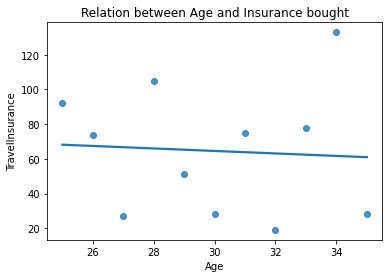

In [23]:
#relation between age and insurance bought
cus_by_age = travel_df.groupby('Age').agg({'AnnualIncome':'mean','FamilyMembers':'mean','TravelInsurance':'sum'}).sort_values('TravelInsurance', ascending = False)
cus_by_age = cus_by_age.reset_index()

sns.regplot(data= cus_by_age,x='Age',y='TravelInsurance', ci = None)
plt.title('Relation between Age and Insurance bought')

In [24]:
#Do family member effect insurance bought
cus_by_fam = cus_df.groupby('FamilyMembers').agg({'Age':'mean','AnnualIncome':'mean','TravelInsurance':'sum'}).sort_values('TravelInsurance', ascending = False)
cus_by_fam = cus_by_fam.reset_index()
cus_by_fam

,FamilyMembers,Age,AnnualIncome,TravelInsurance
0,4,29.381250,1.155625e+06,160
1,3,29.429630,1.156667e+06,135
2,5,29.251908,1.187405e+06,131
3,6,30.782946,1.115116e+06,129
4,7,31.037037,1.042593e+06,81
5,2,28.666667,1.192593e+06,27
6,9,30.192308,1.042308e+06,26
7,8,31.952381,9.714286e+05,21


Text(0.5, 1.0, 'Relation between Family members and Insurance')

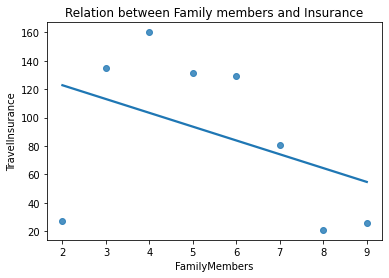

In [25]:
sns.regplot(data=cus_by_fam, x='FamilyMembers',y='TravelInsurance', ci = None)
plt.title('Relation between Family members and Insurance')

Text(0.5, 1.0, 'Relation between Family members and Income')

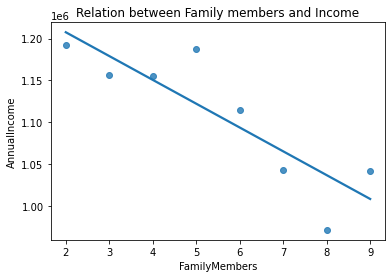

In [26]:
sns.regplot(data=cus_by_fam, x='FamilyMembers',y='AnnualIncome', ci = None)
plt.title('Relation between Family members and Income')

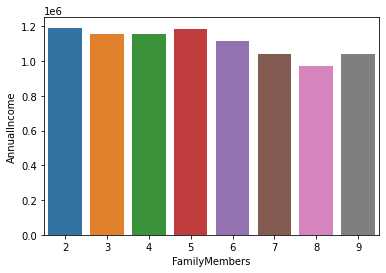

In [27]:
sns.barplot(data=cus_by_fam, x='FamilyMembers',y='AnnualIncome')
plt.show()

In [28]:
cus_by_age = cus_df.groupby('Age').agg({'AnnualIncome':'mean','FamilyMembers':'mean','TravelInsurance':'sum'}).sort_values(['TravelInsurance','AnnualIncome'], ascending = False)
cus_by_age = cus_by_age.reset_index()
cus_by_age

,Age,AnnualIncome,FamilyMembers,TravelInsurance
0,34,1.177820e+06,5.398496,133
1,28,9.438095e+05,4.685714,105
2,25,1.461413e+06,4.543478,92
3,33,1.000000e+06,5.435897,78
4,31,1.299333e+06,4.506667,75
5,26,1.312838e+06,4.756757,74
6,29,1.000980e+06,5.000000,51
7,30,9.750000e+05,4.714286,28
8,35,8.857143e+05,5.500000,28
9,27,8.851852e+05,4.185185,27


<AxesSubplot:xlabel='FamilyMembers', ylabel='TravelInsurance'>

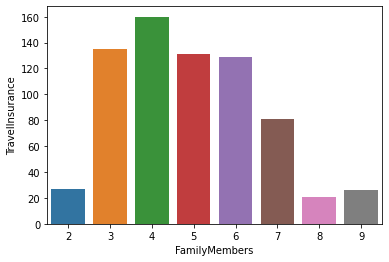

In [29]:
sns.barplot(data=cus_by_fam,x='FamilyMembers',y='TravelInsurance')